<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

<a id='p1'></a>
## I.- Problema 01


<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>

El **cáncer de mama** es una proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Esta enfermedad clonal surge cuando una célula adquiere, a través de mutaciones, la capacidad de dividirse sin control, formando un tumor que puede invadir tejidos vecinos y propagarse a otras partes del cuerpo.

El conjunto de datos `BC.csv` contiene información sobre pacientes con tumores (benignos o malignos) y diversas características del tumor, calculadas a partir de imágenes digitalizadas de aspirados con aguja fina (FNA) de masas mamarias. Estas características describen los núcleos celulares en la imagen y permiten diferenciar entre tumores benignos y malignos.

A continuación, cargamos el conjunto de datos:

In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0}).astype(int) 

# Visualizar las primeras filas del DataFrame
df.head()

C:\Users\jqnra\AppData\Local\Temp\ipykernel_9016\700510148.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0}).astype(int)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Con base en la información presentada, responde las siguientes preguntas. Asegúrate de incluir el código necesario para realizar los análisis requeridos y proporciona una breve explicación que describa tus resultados y el proceso que seguiste.




1. Realice un análisis exploratorio del conjunto de datos.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [3]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

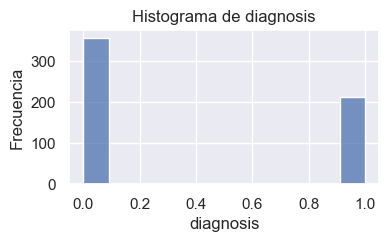

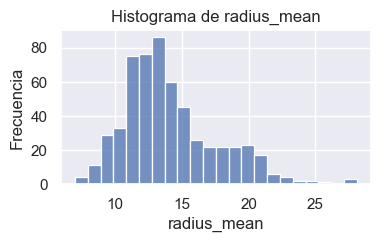

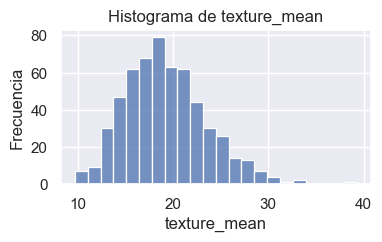

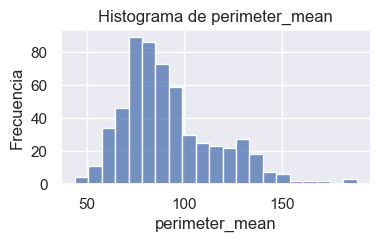

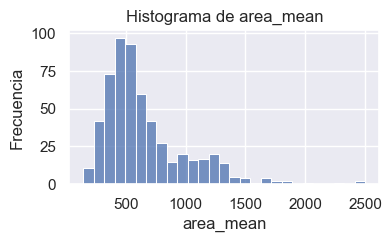

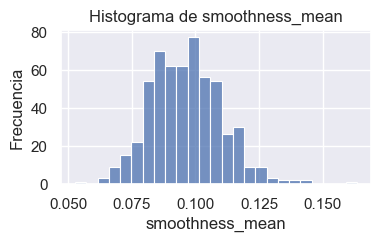

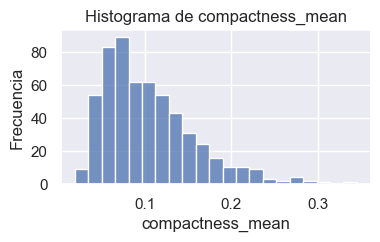

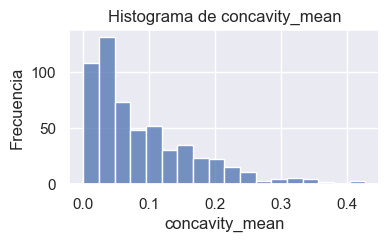

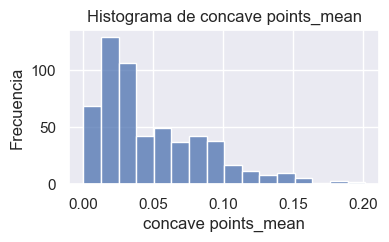

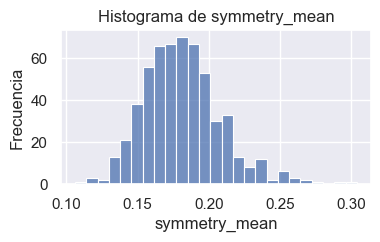

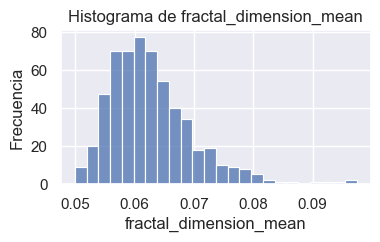

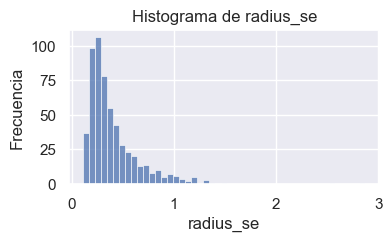

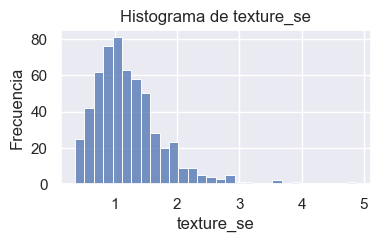

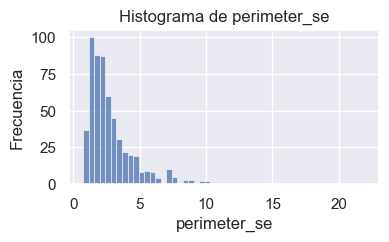

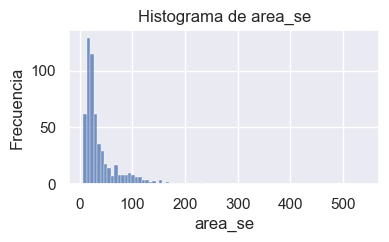

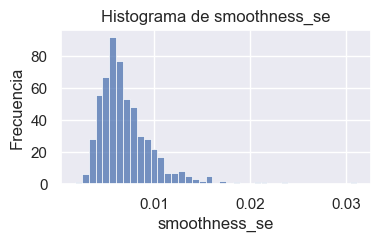

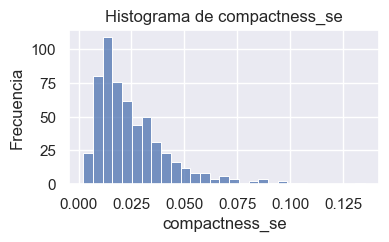

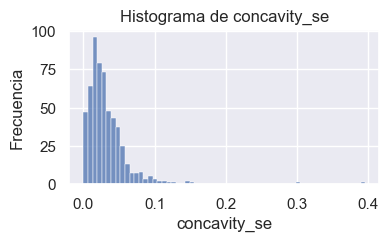

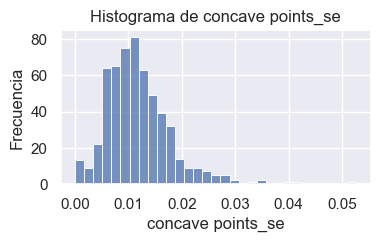

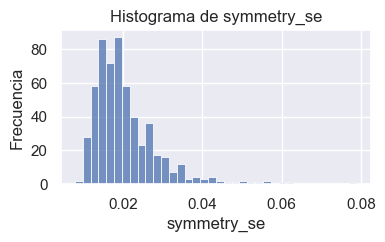

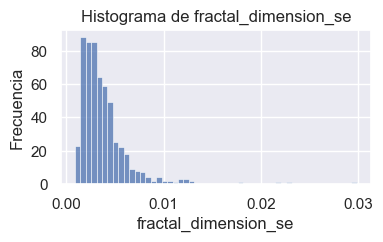

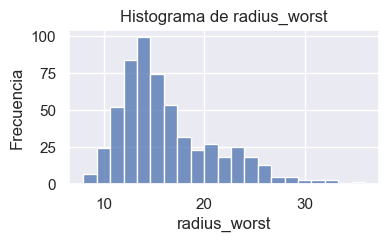

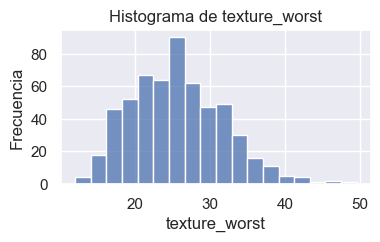

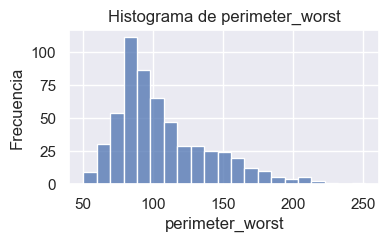

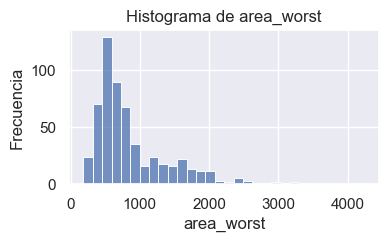

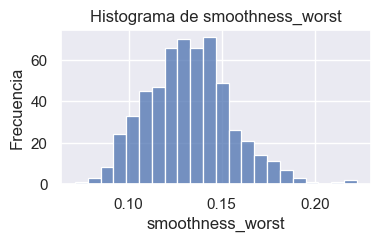

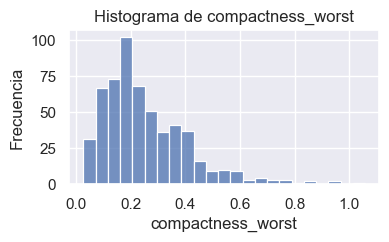

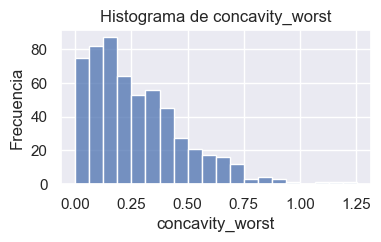

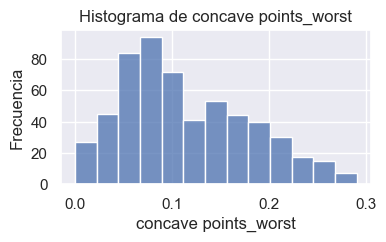

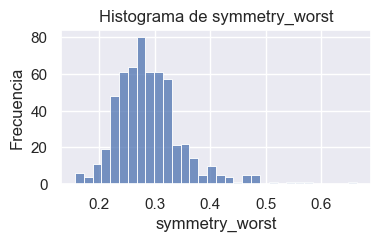

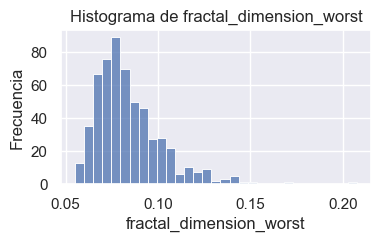

In [6]:
for columna in df.select_dtypes(include='number').columns:  # Filtra solo las columnas numéricas
    plt.figure(figsize=(4, 2))
    sns.histplot(df[columna], kde=False)  # kde=True agrega una curva de densidad
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show() 

2. Normalizar las variables numéricas con el método **StandardScaler**.

In [15]:
numericas = df.select_dtypes(include = "number")
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(numericas), columns=numericas.columns)

df_scaled.head(10)

0    1.297676
1    1.297676
2    1.297676
3    1.297676
4    1.297676
5    1.297676
6    1.297676
7    1.297676
8    1.297676
9    1.297676
Name: diagnosis, dtype: float64

3. Realizar un método de reducción de dimensionalidad visto en clases.

Text(0, 0.5, 'Acummulated Explained Variance')

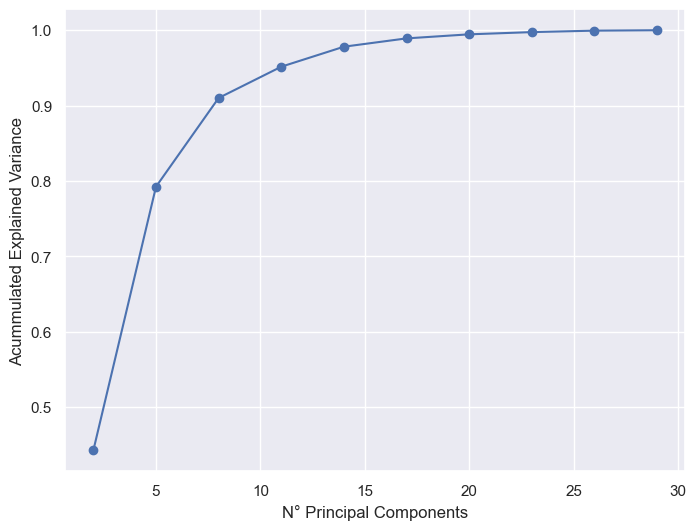

In [25]:
X = df_scaled.drop('diagnosis',axis = 1)
y = df['diagnosis']

n_var = []
for n in range(1,31,3):
    pca = PCA(n_components=n)
    pca.set_output(transform='pandas')
    pca.fit(X)
    n_var.append(pca.explained_variance_ratio_.sum())

fig, axes = plt.subplots(figsize=(8,6))
axes.plot(range(2,31,3), n_var, marker='o')
axes.set_xlabel('N° Principal Components')
axes.set_ylabel('Acummulated Explained Variance')

17 parece ser un buen número de dimensiones.

In [ ]:
pca = PCA(n_components = 17)
pca.set_output(transform = "pandas")
pca.fit(X)
X_pca = pca.fit_transform(df_scaled)

4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

__Regrsión Logística:__

In [27]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=200)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)

print("Precisión con reducción de dimensionalidad (PCA): {:.3f}".format(accuracy))

Precisión con reducción de dimensionalidad (PCA): 0.982


__Random Forest Classifier:__

In [28]:
# Crear el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 árboles en el bosque

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión con reducción de dimensionalidad (PCA): {:.3f}".format(accuracy))

Precisión con reducción de dimensionalidad (PCA): 0.971


__SVM:__

In [29]:
# Crear el modelo SVM
model = SVC(kernel='linear', random_state=42)  # Usamos el kernel lineal

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión con reducción de dimensionalidad (PCA): {:.3f}".format(accuracy))

Precisión con reducción de dimensionalidad (PCA): 0.977


El modelo con mayor presición después de aplicar el PCA es la regresión logística.